In [1]:
"""
@File    :   Figure3
@Author  :   chend
@Contact :   chend@hust.edu.cn
"""
import sys
sys.path.append("../utils")
from utils import *
from scipy import optimize
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

In [2]:
def fit_line(x, A, B):
    return A * x + B

def ger_d(x, y):
    x0 = np.log10(np.array(x))
    y0 = np.log10(np.array(y))
    A0, B0 = optimize.curve_fit(fit_line, x0, y0)[0]
    print("A = ", A0)
    print("B = ", B0)

    xx0 = np.arange(min(x),max(x), 1e-3)
    yy0 = (10**B0) * xx0 ** A0

    return xx0, yy0

### 1. BA scale-free networks

#### The parameter $m = 2$.

In [5]:
KT = [2, 5, 7, 10, 15, 20, 30, 40, 50, 70] # m = 2
N = 10000
m = 2
samples = 10

unit = np.ones(len(KT))

y0 = np.empty(shape=[0, len(KT)])
y1 = np.empty(shape=[0, len(KT)])
y2 = np.empty(shape=[0, len(KT)])
y22 = np.empty(shape=[0, len(KT)])
y3 = np.empty(shape=[0, len(KT)])

for i in range(samples):
    G = nx.barabasi_albert_graph(N, m)
    NKT, kmax, av_k, av_clus = get_kmax_avk_avc(G, KT, len(KT))
    nom_av_k = np.array(av_k)/(np.array(NKT)-unit)
    y0 = np.append(y0, NKT.reshape(1,len(KT)), axis=0)
    y1 = np.append(y1, kmax.reshape(1,len(KT)), axis=0)
    y2 = np.append(y2, av_k.reshape(1,len(KT)), axis=0)
    y22 = np.append(y22, nom_av_k.reshape(1,len(KT)), axis=0)
    y3 = np.append(y3, av_clus.reshape(1,len(KT)), axis=0)


av_NKT = np.mean(y0, axis=0)
std_NKT = np.std(y0, axis=0)

av_kmax = np.mean(y1, axis=0)
std_kmax = np.std(y1, axis=0)
x00, y00 = ger_d(av_NKT, av_kmax)

avk = np.mean(y2, axis=0)
std_avk = np.std(y2, axis=0)

nom_avk = np.mean(y22, axis=0)
std_nom_avk = np.std(y22, axis=0)
x1, y1 = ger_d(av_NKT, nom_avk)


avc = np.mean(y3, axis=0)
std_avc = np.std(y3, axis=0)
x22, y22 = ger_d(av_NKT, avc)


theoretical_avc = (np.log(np.array(av_NKT)))**2/(np.array(av_NKT))
x33, y33 = ger_d(av_NKT, theoretical_avc)

A =  0.5574853742963223
B =  0.17919477664135583
A =  -0.9586416016564662
B =  0.4462168672964693
A =  -0.611975860110419
B =  0.07895260345250107
A =  -0.5996322766984507
B =  0.46984935010870493


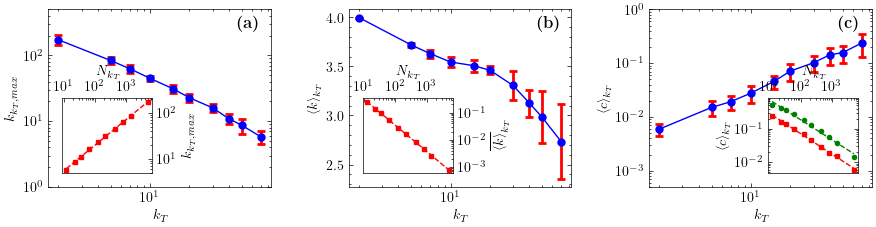

In [6]:
with plt.style.context(['science', 'scatter']):
    fig, axs = plt.subplots(1, 3, figsize=(9, 2.5))

    ax1 = axs[0]
    ax2 = axs[1]
    ax3 = axs[2]

    # plot main figure
    ax1.errorbar(KT, av_kmax, yerr=std_kmax, fmt = "bo-", ms = 5, ecolor='r', elinewidth=2, capsize=3, capthick=2)
    # ax1.plot(x0, y0, "b--")
    ax1.set_xscale('log')
    ax1.set_yscale('log')
    # ax1.set_xlim([5e-1,1.2e2])
    ax1.set_ylim([1,5e2])
    ax1.set_xlabel("$k_T$")
    ax1.set_ylabel(r"$k_{k_T, max}$")
    ax1.set_title(r'\textbf{(a)}', x = 0.9, y = 0.85)


    # plot inset
    axins1 = inset_axes(ax1, width=0.9, height=0.75, loc=3, borderpad=1.0)
    axins1.plot(av_NKT, av_kmax, "rs")
    axins1.plot(x00, y00, "r--")
    axins1.set_xscale('log')
    axins1.set_yscale('log')
    axins1.set_xlabel(r'$N_{k_T}$')
    axins1.set_ylabel(r"$k_{k_T, max}$")
    axins1.xaxis.set_label_position("top")
    axins1.xaxis.tick_top()
    axins1.yaxis.set_label_position("right")
    axins1.yaxis.tick_right()


    ax2.errorbar(KT, avk, yerr=std_avk, fmt = "bo-", ms = 5, ecolor='r', elinewidth=2, capsize=3, capthick=2)
    ax2.set_xscale('log')
    # ax2.set_xlim([5e-1,1.2e2])
    ax2.set_xlabel("$k_T$")
    ax2.set_ylabel(r"$\langle k \rangle_{k_T}$")
    ax2.set_title(r'\textbf{(b)}', x = 0.9, y = 0.85)

    axins2 = inset_axes(ax2, width=0.9, height=0.75, loc=3, borderpad=1.0)
    axins2.plot(av_NKT, nom_avk, "rs")
    axins2.plot(x1, y1, "r--")
    axins2.set_xscale('log')
    axins2.set_yscale('log')
    axins2.set_xlabel(r'$N_{k_T}$')
    axins2.set_ylabel(r'$\overline{\langle k \rangle}_{k_T}$')
    axins2.xaxis.set_label_position("top")
    axins2.xaxis.tick_top()
    axins2.yaxis.set_label_position("right")
    axins2.yaxis.tick_right()


    ax3.errorbar(KT, avc, yerr=std_avc, fmt = "bo-", ms = 5, ecolor='r', elinewidth=2, capsize=3, capthick=2)
    ax3.set_xscale("log")
    ax3.set_yscale("log")
    ax3.set_ylim([5e-4,1])
    ax3.set_xlabel("$k_T$")
    ax3.set_ylabel(r"$\langle c \rangle_{k_T}$")
    ax3.set_title(r'\textbf{(c)}', x = 0.9, y = 0.85)

    axins3 = inset_axes(ax3, width=0.9, height=0.75, loc=4, borderpad=1.0)
    axins3.plot(av_NKT, avc, "rs")
    axins3.plot(x22, y22, "r--")
    axins3.plot(av_NKT, theoretical_avc, "go")
    axins3.plot(x33, y33, "g--")
    axins3.set_xscale('log')
    axins3.set_yscale('log')
    axins3.set_xlabel(r'$N_{k_T}$')
    axins3.set_ylabel(r"$\langle c \rangle_{k_T}$")
    axins3.xaxis.set_label_position("top")
    axins3.xaxis.tick_top()

    plt.subplots_adjust(left=0.065, bottom=0.20, right=0.98, top=0.91, wspace=0.35)
    plt.show()


#### The parameter $m = 5$.

In [7]:
KT = [3, 5, 7, 10, 15, 20, 30, 40, 50, 70, 100] # m = 5
N = 10000
m = 5
samples = 10

unit = np.ones(len(KT))

y0 = np.empty(shape=[0, len(KT)])
y1 = np.empty(shape=[0, len(KT)])
y2 = np.empty(shape=[0, len(KT)])
y22 = np.empty(shape=[0, len(KT)])
y3 = np.empty(shape=[0, len(KT)])

for i in range(samples):
    G = nx.barabasi_albert_graph(N, m)
    NKT, kmax, av_k, av_clus = get_kmax_avk_avc(G, KT, len(KT))
    nom_av_k = np.array(av_k)/(np.array(NKT)-unit)
    y0 = np.append(y0, NKT.reshape(1,len(KT)), axis=0)
    y1 = np.append(y1, kmax.reshape(1,len(KT)), axis=0)
    y2 = np.append(y2, av_k.reshape(1,len(KT)), axis=0)
    y22 = np.append(y22, nom_av_k.reshape(1,len(KT)), axis=0)
    y3 = np.append(y3, av_clus.reshape(1,len(KT)), axis=0)


av_NKT = np.mean(y0, axis=0)
std_NKT = np.std(y0, axis=0)

av_kmax = np.mean(y1, axis=0)
std_kmax = np.std(y1, axis=0)
x00, y00 = ger_d(av_NKT, av_kmax)

avk = np.mean(y2, axis=0)
std_avk = np.std(y2, axis=0)

nom_avk = np.mean(y22, axis=0)
std_nom_avk = np.std(y22, axis=0)
x1, y1 = ger_d(av_NKT, nom_avk)

avc = np.mean(y3, axis=0)
std_avc = np.std(y3, axis=0)
x22, y22 = ger_d(av_NKT, avc)

theoretical_avc = (np.log(np.array(av_NKT)))**2/(np.array(av_NKT))
x33, y33 = ger_d(av_NKT, theoretical_avc)

A =  0.5255101947427117
B =  0.506522388180172
A =  -0.9629006734276297
B =  0.8573243913223729
A =  -0.6939955486767241
B =  0.648378357354615
A =  -0.6718797911587845
B =  0.660660739377795


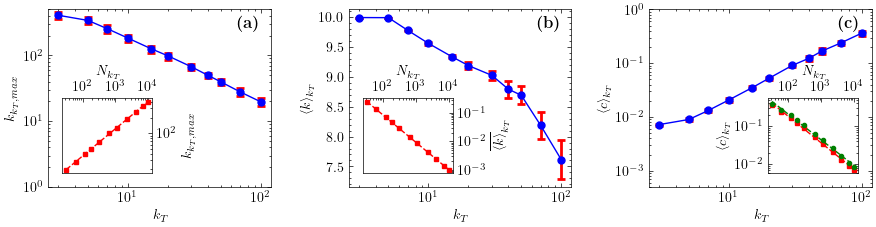

In [8]:
with plt.style.context(['science', 'scatter']):
    fig, axs = plt.subplots(1, 3, figsize=(9, 2.5))

    ax1 = axs[0]
    ax2 = axs[1]
    ax3 = axs[2]

    ax1.errorbar(KT, av_kmax, yerr=std_kmax, fmt = "bo-", ms = 5, ecolor='r', elinewidth=2, capsize=3, capthick=2)
    # ax1.plot(x0, y0, "b--")
    ax1.set_xscale('log')
    ax1.set_yscale('log')
    # ax1.set_xlim([5e-1,1.2e2])
    ax1.set_ylim([1,5e2])
    ax1.set_xlabel("$k_T$")
    ax1.set_ylabel(r"$k_{k_T, max}$")
    ax1.set_title(r'\textbf{(a)}', x = 0.9, y = 0.85)


    axins1 = inset_axes(ax1, width=0.9, height=0.75, loc=3, borderpad=1.0)
    axins1.plot(av_NKT, av_kmax, "rs")
    axins1.plot(x00, y00, "r--")
    axins1.set_xscale('log')
    axins1.set_yscale('log')
    axins1.set_xlabel(r'$N_{k_T}$')
    axins1.set_ylabel(r"$k_{k_T, max}$")
    axins1.xaxis.set_label_position("top")
    axins1.xaxis.tick_top()
    axins1.yaxis.set_label_position("right")
    axins1.yaxis.tick_right()


    ax2.errorbar(KT, avk, yerr=std_avk, fmt = "bo-", ms = 5, ecolor='r', elinewidth=2, capsize=3, capthick=2)
    ax2.set_xscale('log')
    # ax2.set_xlim([5e-1,1.2e2])
    ax2.set_xlabel("$k_T$")
    ax2.set_ylabel(r"$\langle k \rangle_{k_T}$")
    ax2.set_title(r'\textbf{(b)}', x = 0.9, y = 0.85)

    axins2 = inset_axes(ax2, width=0.9, height=0.75, loc=3, borderpad=1.0)
    axins2.plot(av_NKT, nom_avk, "rs")
    axins2.plot(x1, y1, "r--")
    axins2.set_xscale('log')
    axins2.set_yscale('log')
    axins2.set_xlabel(r'$N_{k_T}$')
    axins2.set_ylabel(r'$\overline{\langle k \rangle}_{k_T}$')
    axins2.xaxis.set_label_position("top")
    axins2.xaxis.tick_top()
    axins2.yaxis.set_label_position("right")
    axins2.yaxis.tick_right()


    ax3.errorbar(KT, avc, yerr=std_avc, fmt = "bo-", ms = 5, ecolor='r', elinewidth=2, capsize=3, capthick=2)
    ax3.set_xscale("log")
    ax3.set_yscale("log")
    ax3.set_ylim([5e-4,1])
    ax3.set_xlabel("$k_T$")
    ax3.set_ylabel(r"$\langle c \rangle_{k_T}$")
    ax3.set_title(r'\textbf{(c)}', x = 0.9, y = 0.85)

    axins3 = inset_axes(ax3, width=0.9, height=0.75, loc=4, borderpad=1.0)
    axins3.plot(av_NKT, avc, "rs")
    axins3.plot(x22, y22, "r--")
    axins3.plot(av_NKT, theoretical_avc, "go")
    axins3.plot(x33, y33, "g--")
    axins3.set_xscale('log')
    axins3.set_yscale('log')
    axins3.set_xlabel(r'$N_{k_T}$')
    axins3.set_ylabel(r"$\langle c \rangle_{k_T}$")
    axins3.xaxis.set_label_position("top")
    axins3.xaxis.tick_top()

    plt.subplots_adjust(left=0.065, bottom=0.20, right=0.98, top=0.91, wspace=0.35)
    plt.show()

#### The parameter $m = 10$.

In [9]:
KT = [10, 15, 20, 30, 40, 50, 70, 100, 150, 200] # m = 10
N = 10000
m = 10
samples = 10

unit = np.ones(len(KT))

y0 = np.empty(shape=[0, len(KT)])
y1 = np.empty(shape=[0, len(KT)])
y2 = np.empty(shape=[0, len(KT)])
y22 = np.empty(shape=[0, len(KT)])
y3 = np.empty(shape=[0, len(KT)])

for i in range(samples):
    G = nx.barabasi_albert_graph(N, m)
    NKT, kmax, av_k, av_clus = get_kmax_avk_avc(G, KT, len(KT))
    nom_av_k = np.array(av_k)/(np.array(NKT)-unit)
    y0 = np.append(y0, NKT.reshape(1,len(KT)), axis=0)
    y1 = np.append(y1, kmax.reshape(1,len(KT)), axis=0)
    y2 = np.append(y2, av_k.reshape(1,len(KT)), axis=0)
    y22 = np.append(y22, nom_av_k.reshape(1,len(KT)), axis=0)
    y3 = np.append(y3, av_clus.reshape(1,len(KT)), axis=0)


av_NKT = np.mean(y0, axis=0)
std_NKT = np.std(y0, axis=0)

av_kmax = np.mean(y1, axis=0)
std_kmax = np.std(y1, axis=0)
x00, y00 = ger_d(av_NKT, av_kmax)

avk = np.mean(y2, axis=0)
std_avk = np.std(y2, axis=0)

nom_avk = np.mean(y22, axis=0)
std_nom_avk = np.std(y22, axis=0)
x1, y1 = ger_d(av_NKT, nom_avk)

avc = np.mean(y3, axis=0)
std_avc = np.std(y3, axis=0)
x22, y22 = ger_d(av_NKT, avc)

theoretical_avc = (np.log(np.array(av_NKT)))**2/(np.array(av_NKT))
x33, y33 = ger_d(av_NKT, theoretical_avc)

A =  0.5254127533568642
B =  0.6223250498841233
A =  -0.9444677431980576
B =  1.1037040201998884
A =  -0.6748600276138198
B =  0.7772793194130587
A =  -0.6634453855082573
B =  0.6422748198600947


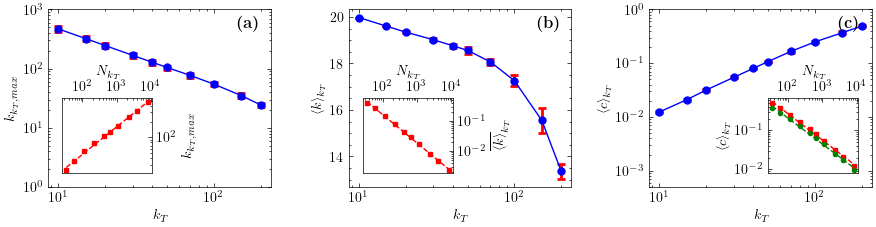

In [10]:
with plt.style.context(['science', 'scatter']):
    fig, axs = plt.subplots(1, 3, figsize=(9, 2.5))

    ax1 = axs[0]
    ax2 = axs[1]
    ax3 = axs[2]

    ax1.errorbar(KT, av_kmax, yerr=std_kmax, fmt = "bo-", ms = 5, ecolor='r', elinewidth=2, capsize=3, capthick=2)
    # ax1.plot(x0, y0, "b--")
    ax1.set_xscale('log')
    ax1.set_yscale('log')
    # ax1.set_xlim([5e-1,1.2e2])
    ax1.set_ylim([1,1e3])
    ax1.set_xlabel("$k_T$")
    ax1.set_ylabel(r"$k_{k_T, max}$")
    ax1.set_title(r'\textbf{(a)}', x = 0.9, y = 0.85)


    axins1 = inset_axes(ax1, width=0.9, height=0.75, loc=3, borderpad=1.0)
    axins1.plot(av_NKT, av_kmax, "rs")
    axins1.plot(x00, y00, "r--")
    axins1.set_xscale('log')
    axins1.set_yscale('log')
    axins1.set_xlabel(r'$N_{k_T}$')
    axins1.set_ylabel(r"$k_{k_T, max}$")
    axins1.xaxis.set_label_position("top")
    axins1.xaxis.tick_top()
    axins1.yaxis.set_label_position("right")
    axins1.yaxis.tick_right()


    ax2.errorbar(KT, avk, yerr=std_avk, fmt = "bo-", ms = 5, ecolor='r', elinewidth=2, capsize=3, capthick=2)
    ax2.set_xscale('log')
    # ax2.set_xlim([5e-1,1.2e2])
    ax2.set_xlabel("$k_T$")
    ax2.set_ylabel(r"$\langle k \rangle_{k_T}$")
    ax2.set_title(r'\textbf{(b)}', x = 0.9, y = 0.85)

    axins2 = inset_axes(ax2, width=0.9, height=0.75, loc=3, borderpad=1.0)
    axins2.plot(av_NKT, nom_avk, "rs")
    axins2.plot(x1, y1, "r--")
    axins2.set_xscale('log')
    axins2.set_yscale('log')
    axins2.set_xlabel(r'$N_{k_T}$')
    axins2.set_ylabel(r'$\overline{\langle k \rangle}_{k_T}$')
    axins2.xaxis.set_label_position("top")
    axins2.xaxis.tick_top()
    axins2.yaxis.set_label_position("right")
    axins2.yaxis.tick_right()


    ax3.errorbar(KT, avc, yerr=std_avc, fmt = "bo-", ms = 5, ecolor='r', elinewidth=2, capsize=3, capthick=2)
    ax3.set_xscale("log")
    ax3.set_yscale("log")
    ax3.set_ylim([5e-4,1])
    ax3.set_xlabel("$k_T$")
    ax3.set_ylabel(r"$\langle c \rangle_{k_T}$")
    ax3.set_title(r'\textbf{(c)}', x = 0.9, y = 0.85)

    axins3 = inset_axes(ax3, width=0.9, height=0.75, loc=4, borderpad=1.0)
    axins3.plot(av_NKT, avc, "rs")
    axins3.plot(x22, y22, "r--")
    axins3.plot(av_NKT, theoretical_avc, "go")
    axins3.plot(x33, y33, "g--")
    axins3.set_xscale('log')
    axins3.set_yscale('log')
    axins3.set_xlabel(r'$N_{k_T}$')
    axins3.set_ylabel(r"$\langle c \rangle_{k_T}$")
    axins3.xaxis.set_label_position("top")
    axins3.xaxis.tick_top()

    plt.subplots_adjust(left=0.065, bottom=0.20, right=0.98, top=0.91, wspace=0.35)
    plt.show()

### 2. CL scale-free networks

#### The degree distribution exponent $\lambda = 2.1$

In [14]:
n = 100000
lambda_exp = 2.1
kappa_max = 1000
mean_kappa = 10
p = 1/(lambda_exp-1)
c = (1-p)*mean_kappa*(n**p)
i0 = (c/kappa_max)**(1/p) - 1
w = [c/((i+i0)**p) for i in range(n)]

KT = [1,3,5,7,10,15,20,30,40,50,80,100]
samples = 1

unit = np.ones(len(KT))
y0 = np.empty(shape=[0, len(KT)])
y1 = np.empty(shape=[0, len(KT)])
y2 = np.empty(shape=[0, len(KT)])
y22 = np.empty(shape=[0, len(KT)])
y3 = np.empty(shape=[0, len(KT)])

for i in range(samples):
    G = make_nx_graph(w)
    G = delete_zero_degree_nodes(G)
    NKT, kmax, av_k, av_clus = get_kmax_avk_avc(G, KT, len(KT))
    nom_av_k = np.array(av_k)/(np.array(NKT)-unit)
    y0 = np.append(y0, NKT.reshape(1,len(KT)), axis=0)
    y1 = np.append(y1, kmax.reshape(1,len(KT)), axis=0)
    y2 = np.append(y2, av_k.reshape(1,len(KT)), axis=0)
    y22 = np.append(y22, nom_av_k.reshape(1,len(KT)), axis=0)
    y3 = np.append(y3, av_clus.reshape(1,len(KT)), axis=0)


av_NKT = np.mean(y0, axis=0)
std_NKT = np.std(y0, axis=0)

av_kmax = np.mean(y1, axis=0)
std_kmax = np.std(y1, axis=0)
x00, y00 = ger_d(av_NKT, av_kmax)

avk = np.mean(y2, axis=0)
std_avk = np.std(y2, axis=0)

nom_avk = np.mean(y22, axis=0)
std_nom_avk = np.std(y22, axis=0)
x1, y1 = ger_d(av_NKT, nom_avk)

avc = np.mean(y3, axis=0)
std_avc = np.std(y3, axis=0)
x22, y22 = ger_d(av_NKT, avc)

A =  0.32752120471311064
B =  1.4472930013731797
A =  -1.4257105581931455
B =  2.993116929372036
A =  -0.4853290954649186
B =  0.6348425252689504


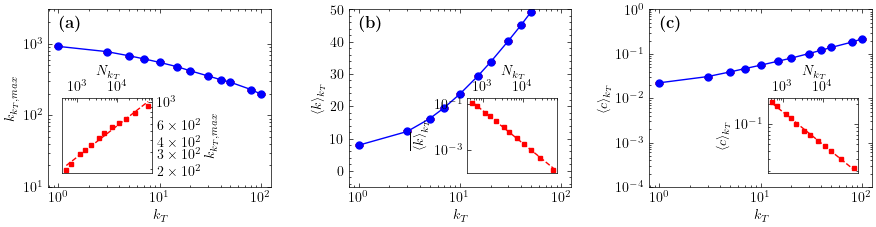

In [16]:
with plt.style.context(['science', 'scatter']):
    fig, axs = plt.subplots(1, 3, figsize=(9, 2.5))

    ax1 = axs[0]
    ax2 = axs[1]
    ax3 = axs[2]

    ax1.errorbar(KT, av_kmax, yerr=std_kmax, fmt = "bo-", ms = 5, ecolor='r', elinewidth=2, capsize=3, capthick=2)
    # ax1.plot(x0, y0, "b--")
    ax1.set_xscale('log')
    ax1.set_yscale('log')
    # ax1.set_xlim([5e-1,1.2e2])
    ax1.set_ylim([1e1,3e3])
    ax1.set_xlabel("$k_T$")
    ax1.set_ylabel(r"$k_{k_T, max}$")
    ax1.set_title(r'\textbf{(a)}', x = 0.1, y = 0.85)


    axins1 = inset_axes(ax1, width=0.9, height=0.75, loc=3, borderpad=1.0)
    axins1.plot(av_NKT, av_kmax, "rs")
    axins1.plot(x00, y00, "r--")
    axins1.set_xscale('log')
    axins1.set_yscale('log')
    axins1.set_xlabel(r'$N_{k_T}$')
    axins1.set_ylabel(r"$k_{k_T, max}$")
    axins1.xaxis.set_label_position("top")
    axins1.xaxis.tick_top()
    axins1.yaxis.set_label_position("right")
    axins1.yaxis.tick_right()


    ax2.errorbar(KT, avk, yerr=std_avk, fmt = "bo-", ms = 5, ecolor='r', elinewidth=2, capsize=3, capthick=2)
    ax2.set_xscale('log')
    ax2.set_ylim([-5, 50])
    ax2.set_xlabel("$k_T$")
    ax2.set_ylabel(r"$\langle k \rangle_{k_T}$")
    ax2.set_title(r'\textbf{(b)}', x = 0.1, y = 0.85)

    axins2 = inset_axes(ax2, width=0.9, height=0.75, loc=4, borderpad=1.0)
    axins2.plot(av_NKT, nom_avk, "rs")
    axins2.plot(x1, y1, "r--")
    axins2.set_xscale('log')
    axins2.set_yscale('log')
    axins2.set_xlabel(r'$N_{k_T}$')
    axins2.set_ylabel(r'$\overline{\langle k \rangle}_{k_T}$')
    axins2.xaxis.set_label_position("top")
    axins2.xaxis.tick_top()
    axins2.yaxis.set_label_position("left")
    axins2.yaxis.tick_left()


    ax3.errorbar(KT, avc, yerr=std_avc, fmt = "bo-", ms = 5, ecolor='r', elinewidth=2, capsize=3, capthick=2)
    ax3.set_xscale("log")
    ax3.set_yscale("log")
    ax3.set_ylim([1e-4,1])
    ax3.set_xlabel("$k_T$")
    ax3.set_ylabel(r"$\langle c \rangle_{k_T}$")
    ax3.set_title(r'\textbf{(c)}', x = 0.1, y = 0.85)

    axins3 = inset_axes(ax3, width=0.9, height=0.75, loc=4, borderpad=1.0)
    axins3.plot(av_NKT, avc, "rs")
    axins3.plot(x22, y22, "r--")
    axins3.set_xscale('log')
    axins3.set_yscale('log')
    axins3.set_xlabel(r'$N_{k_T}$')
    axins3.set_ylabel(r"$\langle c \rangle_{k_T}$")
    axins3.xaxis.set_label_position("top")
    axins3.xaxis.tick_top()

    plt.subplots_adjust(left=0.065, bottom=0.20, right=0.98, top=0.91, wspace=0.35)
    plt.show()

#### The degree distribution exponent $\lambda = 2.5$

In [17]:
n = 100000
lambda_exp = 2.5
kappa_max = 1000
mean_kappa = 10
p = 1/(lambda_exp-1)
c = (1-p)*mean_kappa*(n**p)
i0 = (c/kappa_max)**(1/p) - 1
w = [c/((i+i0)**p) for i in range(n)]

KT = [1,3,5,7,10,15,20,30,40,50,80,100]
samples = 1

unit = np.ones(len(KT))
y0 = np.empty(shape=[0, len(KT)])
y1 = np.empty(shape=[0, len(KT)])
y2 = np.empty(shape=[0, len(KT)])
y22 = np.empty(shape=[0, len(KT)])
y3 = np.empty(shape=[0, len(KT)])

for i in range(samples):
    G = make_nx_graph(w)
    G = delete_zero_degree_nodes(G)
    NKT, kmax, av_k, av_clus = get_kmax_avk_avc(G, KT, len(KT))
    nom_av_k = np.array(av_k)/(np.array(NKT)-unit)
    y0 = np.append(y0, NKT.reshape(1,len(KT)), axis=0)
    y1 = np.append(y1, kmax.reshape(1,len(KT)), axis=0)
    y2 = np.append(y2, av_k.reshape(1,len(KT)), axis=0)
    y22 = np.append(y22, nom_av_k.reshape(1,len(KT)), axis=0)
    y3 = np.append(y3, av_clus.reshape(1,len(KT)), axis=0)


av_NKT = np.mean(y0, axis=0)
std_NKT = np.std(y0, axis=0)

av_kmax = np.mean(y1, axis=0)
std_kmax = np.std(y1, axis=0)
x00, y00 = ger_d(av_NKT, av_kmax)

avk = np.mean(y2, axis=0)
std_avk = np.std(y2, axis=0)

nom_avk = np.mean(y22, axis=0)
std_nom_avk = np.std(y22, axis=0)
x1, y1 = ger_d(av_NKT, nom_avk)

avc = np.mean(y3, axis=0)
std_avc = np.std(y3, axis=0)
x22, y22 = ger_d(av_NKT, avc)

A =  0.406691745083651
B =  0.993326502987164
A =  -1.2022455682955202
B =  2.0463772726381233
A =  -0.6659968349147984
B =  0.8459150885293794


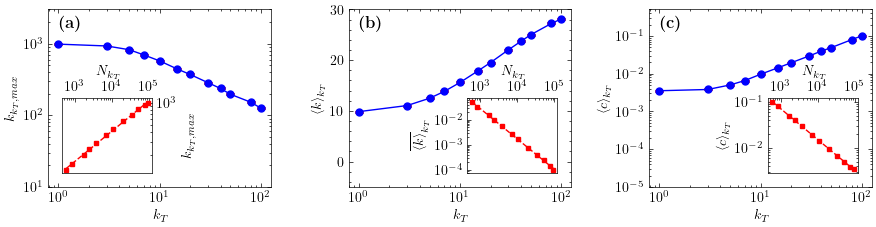

In [18]:
with plt.style.context(['science', 'scatter']):
    fig, axs = plt.subplots(1, 3, figsize=(9, 2.5))

    ax1 = axs[0]
    ax2 = axs[1]
    ax3 = axs[2]

    ax1.errorbar(KT, av_kmax, yerr=std_kmax, fmt = "bo-", ms = 5, ecolor='r', elinewidth=2, capsize=3, capthick=2)
    # ax1.plot(x0, y0, "b--")
    ax1.set_xscale('log')
    ax1.set_yscale('log')
    # ax1.set_xlim([5e-1,1.2e2])
    ax1.set_ylim([1e1,3e3])
    ax1.set_xlabel("$k_T$")
    ax1.set_ylabel(r"$k_{k_T, max}$")
    ax1.set_title(r'\textbf{(a)}', x = 0.1, y = 0.85)


    axins1 = inset_axes(ax1, width=0.9, height=0.75, loc=3, borderpad=1.0)
    axins1.plot(av_NKT, av_kmax, "rs")
    axins1.plot(x00, y00, "r--")
    axins1.set_xscale('log')
    axins1.set_yscale('log')
    axins1.set_xlabel(r'$N_{k_T}$')
    axins1.set_ylabel(r"$k_{k_T, max}$")
    axins1.xaxis.set_label_position("top")
    axins1.xaxis.tick_top()
    axins1.yaxis.set_label_position("right")
    axins1.yaxis.tick_right()


    ax2.errorbar(KT, avk, yerr=std_avk, fmt = "bo-", ms = 5, ecolor='r', elinewidth=2, capsize=3, capthick=2)
    ax2.set_xscale('log')
    ax2.set_ylim([-5, 30])
    ax2.set_xlabel("$k_T$")
    ax2.set_ylabel(r"$\langle k \rangle_{k_T}$")
    ax2.set_title(r'\textbf{(b)}', x = 0.1, y = 0.85)

    axins2 = inset_axes(ax2, width=0.9, height=0.75, loc=4, borderpad=1.0)
    axins2.plot(av_NKT, nom_avk, "rs")
    axins2.plot(x1, y1, "r--")
    axins2.set_xscale('log')
    axins2.set_yscale('log')
    axins2.set_xlabel(r'$N_{k_T}$')
    axins2.set_ylabel(r'$\overline{\langle k \rangle}_{k_T}$')
    axins2.xaxis.set_label_position("top")
    axins2.xaxis.tick_top()
    axins2.yaxis.set_label_position("left")
    axins2.yaxis.tick_left()


    ax3.errorbar(KT, avc, yerr=std_avc, fmt = "bo-", ms = 5, ecolor='r', elinewidth=2, capsize=3, capthick=2)
    ax3.set_xscale("log")
    ax3.set_yscale("log")
    ax3.set_ylim([1e-5,5e-1])
    ax3.set_xlabel("$k_T$")
    ax3.set_ylabel(r"$\langle c \rangle_{k_T}$")
    ax3.set_title(r'\textbf{(c)}', x = 0.1, y = 0.85)

    axins3 = inset_axes(ax3, width=0.9, height=0.75, loc=4, borderpad=1.0)
    axins3.plot(av_NKT, avc, "rs")
    axins3.plot(x22, y22, "r--")
    axins3.set_xscale('log')
    axins3.set_yscale('log')
    axins3.set_xlabel(r'$N_{k_T}$')
    axins3.set_ylabel(r"$\langle c \rangle_{k_T}$")
    axins3.xaxis.set_label_position("top")
    axins3.xaxis.tick_top()

    plt.subplots_adjust(left=0.065, bottom=0.20, right=0.98, top=0.91, wspace=0.35)
    plt.show()